## Question 1

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
import seaborn as sns
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve

In [2]:
df = pd.read_csv('hepatitis_csv.csv')
df

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.0,19.0,4.1,48.0,True,live


In [3]:
df.dropna(inplace=True)

In [4]:
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))
df

/tmp/ipykernel_7644/2806421102.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
5,34,female,1,0,0,0,0,1,0,0,0,0,0,0.9,95.0,28.0,4.0,75.0,0,live
10,39,female,0,1,0,0,0,0,1,0,0,0,0,1.3,78.0,30.0,4.4,85.0,0,live
11,32,female,1,1,1,0,0,1,1,0,1,0,0,1.0,59.0,249.0,3.7,54.0,0,live
12,41,female,1,1,1,0,0,1,1,0,0,0,0,0.9,81.0,60.0,3.9,52.0,0,live
13,30,female,1,0,1,0,0,1,1,0,0,0,0,2.2,57.0,144.0,4.9,78.0,0,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,45,female,1,1,0,0,0,1,0,0,0,0,0,1.3,85.0,44.0,4.2,85.0,1,live
143,49,female,0,0,1,1,0,1,0,1,1,0,0,1.4,85.0,70.0,3.5,35.0,1,die
145,31,female,0,0,1,0,0,1,0,0,0,0,0,1.2,75.0,173.0,4.2,54.0,1,live
153,53,male,0,0,1,0,0,1,0,1,1,0,1,1.5,81.0,19.0,4.1,48.0,1,live


In [5]:
df_numpy = df.to_numpy
df_numpy

<bound method DataFrame.to_numpy of      age     sex  steroid  antivirals  fatigue  malaise  anorexia  liver_big  \
5     34  female        1           0        0        0         0          1   
10    39  female        0           1        0        0         0          0   
11    32  female        1           1        1        0         0          1   
12    41  female        1           1        1        0         0          1   
13    30  female        1           0        1        0         0          1   
..   ...     ...      ...         ...      ...      ...       ...        ...   
139   45  female        1           1        0        0         0          1   
143   49  female        0           0        1        1         0          1   
145   31  female        0           0        1        0         0          1   
153   53    male        0           0        1        0         0          1   
154   43  female        1           0        1        0         0          1   

   

In [6]:
X = df.drop('class', axis=1)
Y = df['class']

In [7]:
X

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
5,34,female,1,0,0,0,0,1,0,0,0,0,0,0.9,95.0,28.0,4.0,75.0,0
10,39,female,0,1,0,0,0,0,1,0,0,0,0,1.3,78.0,30.0,4.4,85.0,0
11,32,female,1,1,1,0,0,1,1,0,1,0,0,1.0,59.0,249.0,3.7,54.0,0
12,41,female,1,1,1,0,0,1,1,0,0,0,0,0.9,81.0,60.0,3.9,52.0,0
13,30,female,1,0,1,0,0,1,1,0,0,0,0,2.2,57.0,144.0,4.9,78.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,45,female,1,1,0,0,0,1,0,0,0,0,0,1.3,85.0,44.0,4.2,85.0,1
143,49,female,0,0,1,1,0,1,0,1,1,0,0,1.4,85.0,70.0,3.5,35.0,1
145,31,female,0,0,1,0,0,1,0,0,0,0,0,1.2,75.0,173.0,4.2,54.0,1
153,53,male,0,0,1,0,0,1,0,1,1,0,1,1.5,81.0,19.0,4.1,48.0,1


In [8]:
Y

5      live
10     live
11     live
12     live
13     live
       ... 
139    live
143     die
145    live
153    live
154     die
Name: class, Length: 80, dtype: object

In [9]:
X.describe()

,age,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000
mean,40.66250,0.525000,0.262500,0.650000,0.387500,0.150000,0.837500,0.475000,0.187500,0.312500,0.150000,0.125000,1.221250,102.912500,82.025000,3.843750,62.512500,0.41250
std,11.28003,0.502525,0.442769,0.479979,0.490253,0.359324,0.371236,0.502525,0.392775,0.466437,0.359324,0.332805,0.875213,53.684779,71.599974,0.576292,23.427774,0.49539
min,20.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,26.000000,14.000000,2.100000,0.000000,0.00000
25%,32.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,68.250000,30.750000,3.500000,46.000000,0.00000
50%,38.50000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,85.000000,56.500000,4.000000,62.000000,0.00000
75%,49.25000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.300000,133.500000,102.750000,4.200000,77.250000,1.00000
max,72.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.800000,280.000000,420.000000,5.000000,100.000000,1.00000


In [10]:
trX, tesX, trY, tesY = tts(X, Y, test_size=0.2, random_state=12)

In [11]:
trX

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
130,54,female,1,0,0,0,0,1,0,0,0,0,0,1.0,85.0,30.0,4.5,0.0,1
134,38,female,0,0,0,0,0,1,1,0,0,0,0,0.4,243.0,49.0,3.8,90.0,1
121,20,female,0,0,1,1,1,1,0,0,1,1,0,1.0,160.0,118.0,2.9,23.0,1
47,28,male,1,0,1,1,0,1,1,0,0,0,0,1.8,191.0,420.0,3.3,46.0,0
64,49,female,1,0,1,1,0,1,0,0,0,0,0,0.8,103.0,43.0,3.5,66.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,41,female,1,1,1,0,0,1,1,0,0,0,0,0.9,81.0,60.0,3.9,52.0,0
11,32,female,1,1,1,0,0,1,1,0,1,0,0,1.0,59.0,249.0,3.7,54.0,0
17,40,female,0,0,1,0,0,1,1,0,0,0,0,0.6,62.0,166.0,4.0,63.0,0
43,56,female,0,0,1,0,0,1,0,0,0,0,0,0.7,71.0,18.0,4.4,100.0,0


In [12]:
trY

130    live
134     die
121    live
47     live
64     live
       ... 
12     live
11     live
17     live
43     live
139    live
Name: class, Length: 64, dtype: object

In [13]:
tesX

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
102,27,female,0,0,1,0,0,1,1,0,0,0,0,2.4,168.0,227.0,3.0,66.0,1
23,42,female,1,0,0,0,0,1,0,0,0,0,0,0.9,60.0,63.0,4.7,47.0,0
25,27,female,0,0,1,1,0,1,0,0,0,0,0,0.8,95.0,46.0,3.8,100.0,0
18,38,female,1,0,0,0,0,1,0,0,0,0,0,0.7,53.0,42.0,4.1,85.0,1
75,32,female,0,1,1,1,0,1,0,0,0,0,0,1.0,55.0,45.0,4.1,56.0,0
68,39,female,1,0,1,0,0,1,0,0,0,0,0,1.0,34.0,15.0,4.0,54.0,0
19,38,female,0,1,0,0,0,0,1,0,0,0,0,0.7,70.0,28.0,4.2,62.0,0
138,47,female,1,0,1,1,0,1,1,0,1,1,1,1.0,166.0,30.0,2.6,31.0,1
48,36,female,0,0,0,0,0,1,0,1,0,0,0,0.8,85.0,44.0,4.2,85.0,0
29,51,female,0,1,1,1,0,1,0,0,0,0,0,1.0,78.0,58.0,4.6,52.0,0


In [14]:
tesY

102    live
23     live
25     live
18     live
75     live
68     live
19     live
138     die
48     live
29     live
42     live
32     live
127     die
34     live
96     live
38     live
Name: class, dtype: object

## Question 2

In [15]:
time = np.random.normal(20, 10, 10)
time[time < 0] = 0
score = (2 * time + np.ones(10)) + np.random.random(10)
df1 = pd.DataFrame({"Time(in Hrs)" : time, "Score": score})

In [16]:
df1 = df1.round(0).astype(int)

In [17]:
df1.to_csv("Q2.csv")

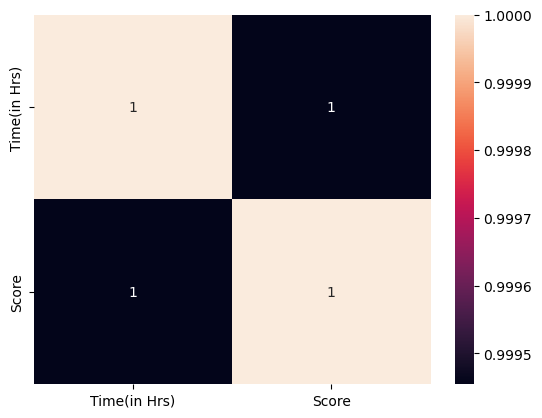

In [18]:
corr_mat = df1.corr()
sns.heatmap(corr_mat, annot=True)
plt.show()

In [19]:
X = df1["Time(in Hrs)"]
Y = df1["Score"]

In [20]:
X_mean = np.mean(X)
Y_mean = np.mean(Y)

In [21]:
B1 = np.sum((X - X_mean) * (Y - Y_mean)) / np.sum((X - X_mean)**2)
B0 = Y_mean - B1 * X_mean
Y_pred = B0 + B1 * X
RMSE = np.sqrt(np.mean((Y - Y_pred)**2))

In [22]:
RMSE

0.45921637213937555

In [23]:
B1

1.9757330637007078

In [24]:
B0

2.1702730030333655

In [25]:
Y_pred

0    35.757735
1    57.490799
2    65.393731
3    53.539333
4    33.782002
5    49.587867
6    39.709201
7    23.903337
8    67.369464
9    59.466532
Name: Time(in Hrs), dtype: float64

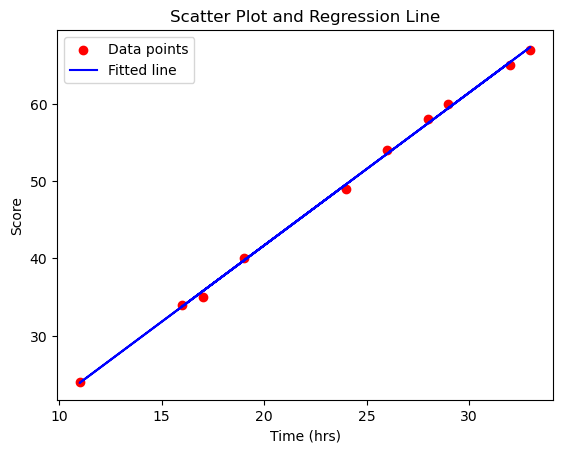

In [26]:
plt.scatter(X, Y, color='red', label='Data points')
plt.plot(X, Y_pred, color='blue', label='Fitted line')
plt.xlabel('Time (hrs)')
plt.ylabel('Score')
plt.title('Scatter Plot and Regression Line')
plt.legend()
plt.show()

In [27]:
B0_sym, B1_sym = symbols('B0 B1')
J = (1/(2*10)) * sum((Y[i] - (B0_sym + B1_sym * X[i]))**2 for i in range(10))
dJ_dB0 = J.diff(B0_sym)
dJ_dB1 = J.diff(B1_sym)
equations = [Eq(dJ_dB0, 0),Eq(dJ_dB1, 0)]
solution = solve(equations, (B0_sym, B1_sym))
solution

{B0: 2.17027300303337, B1: 1.97573306370071}

In [28]:
print(f"Pedhazur Method - B0: {B0}, B1: {B1}")
print(f"Calculus Method - B0: {solution[B0_sym]}, B1: {solution[B1_sym]}")

Pedhazur Method - B0: 2.1702730030333655, B1: 1.9757330637007078
Calculus Method - B0: 2.17027300303337, B1: 1.97573306370071


In [29]:
new_time = 10
predicted_score = B0 + B1 * new_time
print(f"Predicted score for {new_time} hours of study: {predicted_score}")

Predicted score for 10 hours of study: 21.927603640040445
